# Regression Example

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Load Data

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
data = load_diabetes()
df = pd.DataFrame(data=np.c_[ data.data, data.target ],  
                  columns=np.append(data.feature_names, 'target'))
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Train / Test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('target', axis=1)
y = df['target']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cross-validation

In [8]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [9]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
# Declare scores to be used
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
}

## Baseline

In [11]:
from sklearn.dummy import DummyRegressor

In [12]:
bl = DummyRegressor(strategy='mean')
cv_results = cross_validate(bl, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 6070.1
Validation MSE: 6136.7

Train MAE: 66.4
Validation MAE: 66.9


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 2846.1
Validation MSE: 3074.1

Train MAE: 43.3
Validation MAE: 45.0


## k-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# kNN model with 5 neighbors and Euclidean distance

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 2596.2
Validation MSE: 3870.5

Train MAE: 40.6
Validation MAE: 49.4


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [18]:
dt = DecisionTreeRegressor(max_depth=3)
cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 2793.9
Validation MSE: 4169.7

Train MAE: 42.5
Validation MAE: 52.0


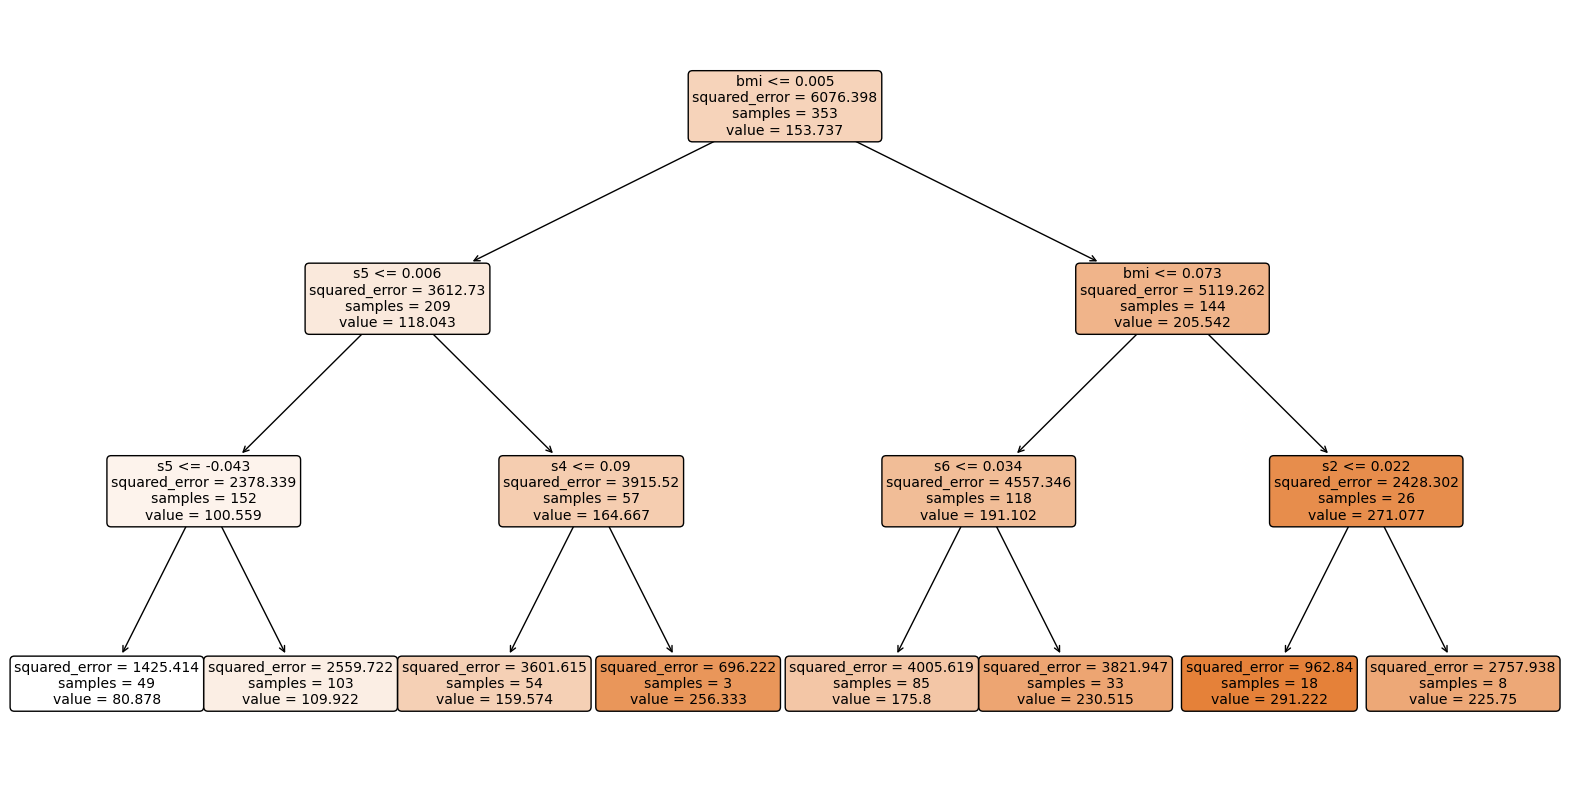

In [67]:
dt.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, rounded=True)
plt.show()

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf = RandomForestRegressor(100, max_depth=10, n_jobs= -1)
cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 525.5
Validation MSE: 3457.0

Train MAE: 18.6
Validation MAE: 48.3


In [122]:
# Retrain the model on the whole training set
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importances

,Feature,Importance
2,bmi,0.333239
8,s5,0.259143
3,bp,0.090557
9,s6,0.068085
5,s2,0.058274
0,age,0.057887
6,s3,0.050964
4,s1,0.047667
7,s4,0.025226
1,sex,0.008957


## Gradient Boosting Decision Tree

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbdt = GradientBoostingRegressor(max_depth=3, learning_rate=0.1)
cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 762.5
Validation MSE: 3748.1

Train MAE: 21.9
Validation MAE: 49.6


## Hyperparameter Tuning

In [1]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Randomized Search

In [104]:
# RandomizedSearchCV with DT
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 11),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["squared_error", "absolute_error"]
}
dt = DecisionTreeRegressor()
dt_rscv = RandomizedSearchCV(dt, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             n_iter=50, cv=kf, verbose=1,
                             refit=lambda x: x["mean_test_MAE"].argmin(), n_jobs=-1)

dt_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", dt_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'min_samples_split': 9, 'min_samples_leaf': 6, 'max_depth': 3, 'criterion': 'absolute_error'}


In [112]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

Train MSE: 3032.2
Validation MSE: 4403.6

Train MAE: 41.2
Validation MAE: 51.7


### Grid Search

In [116]:
# GridSearchCV with DT
param_dist = {
    "max_depth": [3, 10, None],
    "min_samples_split": [9, 10],
    "min_samples_leaf": [5, 6],
    "criterion": ["squared_error", "absolute_error"]
}
dt = DecisionTreeRegressor()
dt_gscv = GridSearchCV(dt, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf, verbose=1, n_jobs=-1)

dt_gscv.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", dt_gscv.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Best GridSearchCV parameters:  {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 9}


In [117]:
print('Train MSE:', dt_gscv.cv_results_['mean_train_MSE'][dt_gscv.best_index_].round(1))
print('Validation MSE:', dt_gscv.cv_results_['mean_test_MSE'][dt_gscv.best_index_].round(1))
print()
print('Train MAE:', dt_gscv.cv_results_['mean_train_MAE'][dt_gscv.best_index_].round(1))
print('Validation MAE:', dt_gscv.cv_results_['mean_test_MAE'][dt_gscv.best_index_].round(1))

Train MSE: 3032.2
Validation MSE: 4403.6

Train MAE: 41.2
Validation MAE: 51.7


## Support Vector Regressor

In [123]:
from sklearn.svm import SVR

In [137]:
svr = Pipeline([
    ('scale', StandardScaler()),
    ('lr', SVR(kernel='rbf', gamma=0.1, C=1.2))
])
cv_results = cross_validate(svr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 5032.0
Validation MSE: 5209.1

Train MAE: 58.7
Validation MAE: 60.3
